## Compare indexes MOEXBC and MIXEC
#### 26.03.2019

In [3]:
# сonnect the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# get data
MICEX = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Diploma/master/MAIN_DATA/MOEX.csv'
                    , header=0, index_col=0, parse_dates={'Date': [0]}, sep=';')
MOEXBC = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Diploma/master/MAIN_DATA/MOEXBC.csv',
                     header=0, index_col=0, parse_dates={'Date': [0]}, sep=';')
df1 = MICEX.iloc[:, 3]
df2 = MOEXBC.iloc[:, 3]
df = pd.merge(df1, df2, left_index=True, right_index=True)
df.columns = ['MICEX', 'MOEXBC']
df.head()

,MICEX,MOEXBC
Date,,
2012-03-01,1628.12,10296.66
2012-04-01,1631.31,10328.87
2012-05-01,1617.02,10248.31
2012-06-01,1623.43,10282.52
2012-09-01,1632.18,10319.86


In [5]:
# get daily returns
ret = df.apply(lambda x: np.log(x)-np.log(x).shift(1))
ret.dropna(inplace = True)
ret.head()

,MICEX,MOEXBC
Date,,
2012-04-01,0.001957,0.003123
2012-05-01,-0.008798,-0.007830
2012-06-01,0.003956,0.003333
2012-09-01,0.005375,0.003625
2012-10-01,0.019500,0.021838


In [6]:
mixec_means = np.mean(ret['MICEX'])
blue = np.mean(ret['MOEXBC'])
print('MIXEC day return: ', round(mixec_means * 100, 4), '%', sep='')
print('MOEXBC day return: ', round(blue * 100, 4), '%', sep='')
print('MIXEC year return: ', round(mixec_means * (len(ret.index) / 7) * 100, 4), '%', sep='')
print('MOEXBC year return: ', round(blue * (len(ret.index) / 7) * 100, 4), '%', sep='')

MIXEC day return: 0.0489%
MOEXBC day return: 0.0482%
MIXEC year return: 12.6923%
MOEXBC year return: 12.5083%


## The returns for 7 years in the indices is almost the same.
## Let's try to calculate the yield for each index for a certain year.

In [7]:
test = ret.iloc[:1813, :]
mean_moex = []
vol_moex = []
mean_blue = []
vol_blue = []
i = 0
j = i + 259
while j <= (len(test.index) + 1):
    mean_moex.append(np.mean(test.iloc[i:j, 0]) * 259)
    vol_moex.append(np.std(test.iloc[i:j, 0]) * np.sqrt(259))
    mean_blue.append(np.mean(test.iloc[i:j, 1]) * 259)
    vol_blue.append(np.std(test.iloc[i:j, 1]) * np.sqrt(259))
    i += 259
    j += 259

In [8]:
data = dict(M_m = mean_moex, M_v = vol_moex, B_m = mean_blue, B_v = vol_blue)
main = pd.DataFrame(data)
# risk free rate = 7.5%
main['M_sharp'] = (main['M_m'] - .075) / main['M_v']
main['B_sharp'] = (main['B_m'] - .075) / main['B_v']
ind_1 = [i for i in range(12, 19)]
ind_2 = [i for i in range(13, 20)]
ind = [str(ind_1[i]) + '-' + str(ind_2[i]) for i in range(7)]
main.index = ind
main

,M_m,M_v,B_m,B_v,M_sharp,B_sharp
12-13,0.090265,0.197595,0.093333,0.195007,0.077256,0.094010
13-14,0.019270,0.159218,0.010421,0.158113,-0.350025,-0.408433
14-15,0.181611,0.251705,0.165072,0.260594,0.423557,0.345640
15-16,0.112569,0.202450,0.108620,0.216355,0.185571,0.155393
16-17,0.174397,0.138531,0.155886,0.150952,0.717508,0.535839
17-18,0.174782,0.133767,0.180874,0.143771,0.745941,0.736405
18-19,0.129992,0.168678,0.153500,0.181434,0.326018,0.432662


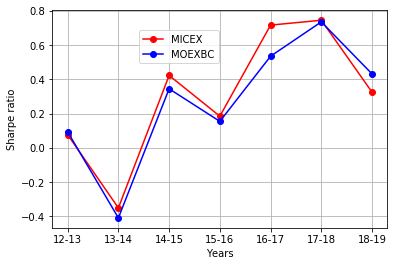

In [9]:
# _=plt.figure(figsize = (15, 10))
_=plt.plot(main.index, main['M_sharp'], c = 'r', marker='o', label = 'MICEX')
_=plt.plot(main.index, main['B_sharp'], c = 'b', marker='o', label = 'MOEXBC')
_=plt.grid(True)
_=plt.legend(bbox_to_anchor=(.2, 1), loc=2, borderaxespad=2)
ax = plt.gca()
# _=ax.set_title('Sharpe ratio to MIXEC and MOEXBC by year', fontsize=20)
_=ax.set_xlabel('Years', fontsize=10)
_=ax.set_ylabel('Sharpe ratio', fontsize=10)